# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats as wstats
import scipy.stats as stats

np.random.seed(42)
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

def ecdf(data):
    '''Compute ECDF for one-dimensional array of measurements'''
    
    # Number of data points:
    n = len(data)
    
    # x-data for the ECDF:
    x = np.sort(data)
    
    # y-data for the ECDF:
    y = np.arange(1, n+1)/n
    
    return x,y

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# Convert Temerature from Fahrenheit to Celsius.
df.temperature = (df.temperature-32)/1.8

In [5]:
df.temperature[:5]

0    37.388889
1    36.888889
2    36.555556
3    37.333333
4    36.666667
Name: temperature, dtype: float64

___

Look before leap, let's graphically examine the distribution of the data first.

__ Q1. Is the distribution of body temperature normal? __

In [6]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean,std,size=10000)
x,y = ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)

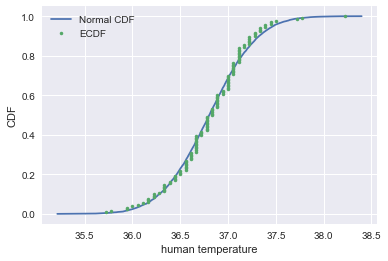

In [7]:
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x, y, marker='.', linestyle = 'none')
_ = plt.xlabel('human temperature')
_ = plt.ylabel('CDF')
_ = plt.legend(('Normal CDF','ECDF'))
plt.show()

__ Answer to Q1: __

By comparing the ECDF of data to normal cdf, we can draw conclusion that distribution of sample data is normal. 
The distribution of body temperature is normal if we assume this sample is representative of the population.

___

When we want to carry out inferences on one population (build a confidence interval or do a significance test), the accuracy of our methods depend on a few conditions. It's important to check whether or not these conditions have been met, otherwise the calculations and conclusions that follow aren't actually valid.

* Independence: which can be simply examined by the 10% rule. The 10% rule says that if the sample size is less than the 10% of the population size, then the sample is independent. 
* The distribution needs to be approximately normal: which require the sample size to be big enough.
* Randomization: which means the data needs to come from a random sample or randomized experiment. 

__ Q2. Is the sample size large? Are the observations independent? __

__ Answer to Q2: __

As a rule of thumb, sample size larger than 30 is considered to be large enough for the CLT to hold true.
As for randomization, since the population size is very big we can assume that each sample represent a random sample from the population.

___

Now, after making sure that the conditions for hypothesis test are met, we could proceed and ask

__ Q3. Is the true population mean really 37 degrees C? __

Since the hypothesis is about relation between a dataset and a single value and the sample size is large, A two-sided one-sample z test for mean should be used. 

However, in order to explore the difference between t and z statistic.
Let's conduct one sample Z-test and T-test for mean and see the difference.

In [8]:
sample_mean = df.temperature.mean()
sample_std = df.temperature.std()
sample_size = df.temperature.size
SEM = sample_std/np.sqrt(sample_size)
DoF = sample_size-1
hypo_mean = 37
test_stats = (sample_mean - hypo_mean)/SEM
print("sample_mean:                    ",sample_mean)
print("sample_std:                     ",sample_std)
print("sample_size:                    ",sample_size)
print("SEM (standard error of mean):   ",SEM)
print("DoF(degree of freedom):         ",DoF)
print("hypo_mean (hypothetical mean):  ",hypo_mean)

sample_mean:                     36.80512820512821
sample_std:                      0.40732397668830306
sample_size:                     130
SEM (standard error of mean):    0.0357246760211
DoF(degree of freedom):          129
hypo_mean (hypothetical mean):   37



The null hypothesis is that the true population mean is 37 degree C.

In [29]:
# Two-sided one sample Z-test for mean
wstats.ztest(df.temperature,value = 37)

(-5.4548232923642752, 4.902157014107954e-08)

In [30]:
# Two-sided one sample T-test for mean
stats.ttest_1samp(df.temperature, hypo_mean)

Ttest_1sampResult(statistic=-5.4548232923642752, pvalue=2.4106320415588179e-07)

Conclusion:

Z-test and T-test all produced a very low p-value (very small difference) which implies 37 degree C is not
the mean normal body temperature. 
The reason why t-statistic and z-statistic produce almost same p-value is that when sample size is big, the T-distribution is very close to normal-distribution.

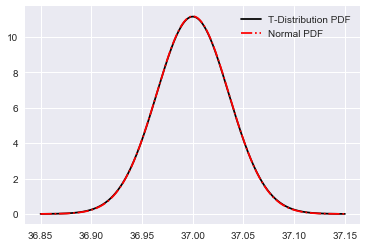

In [31]:
# Graphical validation
xs = np.linspace(36.85,37.15,1000)
_ = plt.plot(xs, stats.t.pdf(xs, df=DoF, loc=hypo_mean, scale=SEM), 'k', label="T-Distribution PDF")
_ = plt.plot(xs, stats.norm.pdf(xs, loc=hypo_mean, scale=SEM),'r-.', label="Normal PDF")
_ = plt.legend(loc='best')
plt.show()

____

We should be careful when the sample size is small, this is because when the sample size is small, the sampling distribution may not be normal. 

__ Q4: Draw a small sample of size 10 from the data and repeat both tests. __

In [12]:
# Draw a small sample of size 10 from the data.
df_small = np.random.choice(df.temperature,size = 10)

In [13]:
# Z test:
wstats.ztest(df_small,value=37)

(-1.2904782426693671, 0.19688466131149995)

In [14]:
# T test:
stats.ttest_1samp(df_small, popmean=37)

Ttest_1sampResult(statistic=-1.2904782426693668, pvalue=0.22905017004892228)

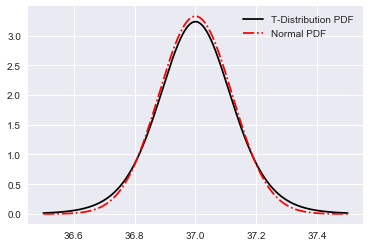

In [15]:
x = np.linspace(36.5,37.5,1000)

_ = plt.plot(x, stats.t.pdf(x, df=9, loc=hypo_mean, scale= 0.12), 'k', label="T-Distribution PDF")
_ = plt.plot(x, stats.norm.pdf(x, loc=hypo_mean, scale= 0.12),'r-.', label="Normal PDF")
_ = plt.legend(loc='best')
plt.show()

For a small sample size, the p-value generated by t test and z test is significantly different. This is because when the sample size is small, the sampling distribution of mean could be best described as a T-distribution which is not close to normal distribution. As we notice, the p-value from t-statistic is bigger, that's becasue the tail of the T-distribution have thicker tails than the normal distribution.

This comparison shows that T-test is more appropriate when sample size is small. 

_______

If 37 degree C is not the true population mean of body temperature then,

__ Q5: At what temperature should we consider someone's temperature to be "abnormal" ? __

Another way to interprete the question could be what is the normal range of body temperature. This can be answered by using confidence interval.

Assume 95% confidence interval is normal range of body temperature. Let's calculate the confidence interval and margin of error.

In [66]:
low,high = stats.norm.interval(0.95,loc=df.temperature.mean(),scale=df.temperature.std())
MoE = (high-low)/2
print("The normal range of body temperature is from %.2f to %.2f"%(low,high))
print("Margin of erro is %.2f."%MoE)

The normal range of body temperature is from 36.01 to 37.60
Margin of erro is 0.80.


_____

Does the normal body temperature range apply to both male and female? or should we use different sets of normal body temperature range when we treat different gender. 

__ Q6: Is there a significant difference between males and females in normal temperature? __

The null hypothesis is that there's no significant difference between males and females in normal temperature which equals to say this two group belong to a same sampling distribution of mean. 
The significance level is set to 5% beforehand. 

In [32]:
male = df[df.gender == 'M']

In [36]:
femal = df[df.gender == 'F']

In [39]:
male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,36.724786,73.369231
std,0.388198,5.875184
min,35.722222,58.000000
25%,36.444444,70.000000
50%,36.722222,73.000000
75%,37.000000,78.000000
max,37.500000,86.000000


In [40]:
femal.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,36.885470,74.153846
std,0.413049,8.105227
min,35.777778,57.000000
25%,36.666667,68.000000
50%,36.888889,76.000000
75%,37.111111,80.000000
max,38.222222,89.000000


The male sample size and femal sample size are both 65 which is large (larger than 30), so the sampling distribution is normal. It's okay to use either two sample z-test or t-test for difference of mean (two-sided). 

The two sample has different standard deviation and the observed difference of mean is (36.89-36.72)=0.17, let's see what is the probability that this two sample would be this far apart if the two groups tested are actually identical. 

In [65]:
# two-sided two sample z-test for identical distribution
wstats.CompareMeans.from_data(male.temperature,femal.temperature).ztest_ind(usevar='unequal')

(-2.2854345381655987, 0.022287360760658233)

In [48]:
# two-sided two sample t-test for identical distribution
stats.ttest_ind(a=male.temperature,b=femal.temperature,equal_var=False)

Ttest_indResult(statistic=-2.2854345381655987, pvalue=0.023938264182934949)

The p-value is less than 5% so the null hypothesis is rejected.
The conclusion is that males and females have significant difference in normal temperature. 